# Pymaceuticals Inc.
---

### Analysis

- There are 249 unique Mice that were tested, with one mice having a duplicated data point. Due to this, I summarized the data using 248 unique mice. 
- I calculated a summary stats table to show the mean, meadian, variance, standard deviation, and standard error of tumor volume. 
- Capomilin and Ramicane had the highest number of observed timepoints. 
- of the mice population, 51% were male and 49% were female. 
- From the top 4 performing drugs, Infubinol had an outlier which was excluded. 
- Capomulin and Ramican had on average lower final tumor volume compared to Infubinol and Ceftamin. 
- There was a high correlation between mouse weight and average tumor volume at 0.84

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how= 'left')

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Checking the number of mice 
data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicateddata=data[data.duplicated(["Mouse ID", "Timepoint"])]
#duplicateddata
data[data.duplicated(["Mouse ID", "Timepoint"])].value_counts("Mouse ID")


Mouse ID
g989    5
Name: count, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
data.loc[data["Mouse ID"] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dataclean = data[data["Mouse ID"] != "g989"]
dataclean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
dataclean["Mouse ID"].nunique()

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarydata = dataclean.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = summarydata["Tumor Volume (mm3)"].mean()
meadian = summarydata["Tumor Volume (mm3)"].median()
variance = summarydata["Tumor Volume (mm3)"].var()
stddev = summarydata["Tumor Volume (mm3)"].std()
SEM = summarydata["Tumor Volume (mm3)"].sem()
summary = ({"Mean Tumor Volume": mean, "Median Tumor Volume": meadian," Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": stddev, "Tumor Volume Std. Err.": SEM })
summary = pd.DataFrame(summary)
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary2 = summarydata["Tumor Volume (mm3)"].agg(["mean", 'median', 'var', 'std', 'sem'])
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

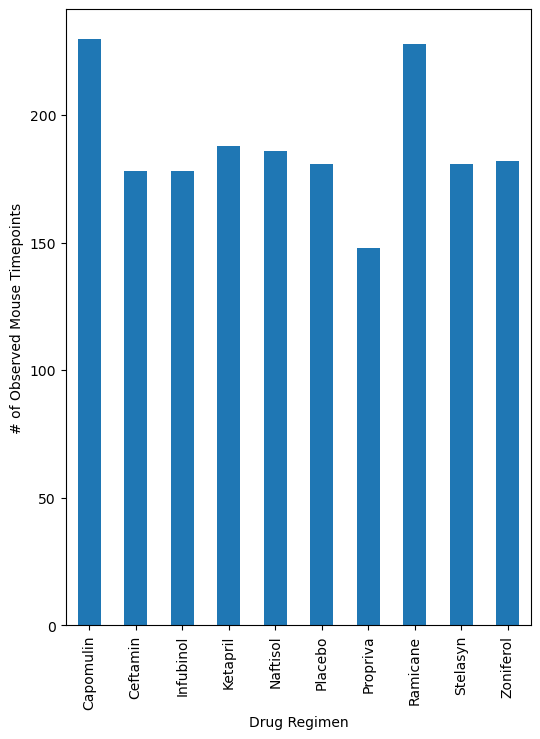

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
barchart = dataclean.groupby(["Drug Regimen"])["Mouse ID"].count().plot(kind = 'bar', figsize =(6,8), xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

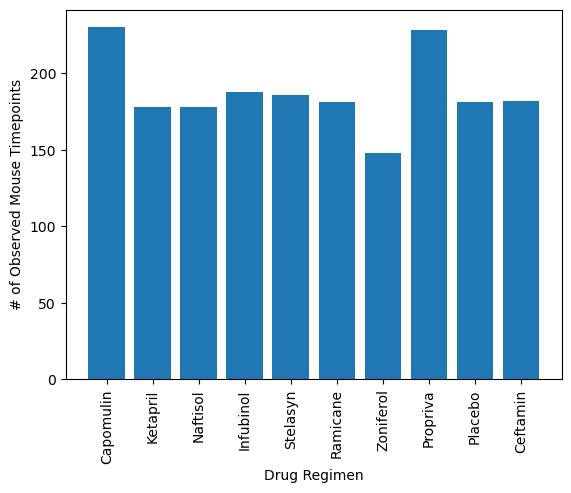

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xaxis = np.arange(len(dataclean.groupby(["Drug Regimen"])))
yaxis = dataclean.groupby(["Drug Regimen"])["Mouse ID"].count()
ticks = [value for value in xaxis]
labels = dataclean["Drug Regimen"].unique()
plt.xticks(ticks, labels = labels, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(xaxis, yaxis)
plt.tight_layout

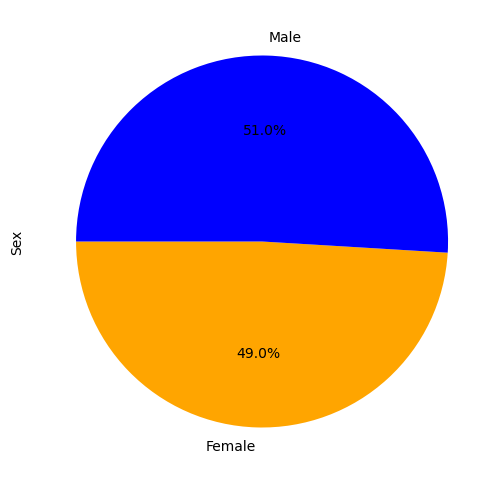

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
piechart = dataclean.groupby(["Sex"])["Mouse ID"].count().plot(kind = 'pie', figsize =(6,8), ylabel = "Sex", autopct = '%1.1f%%', startangle = 180, colors = ["orange", "blue"])
plt.show()

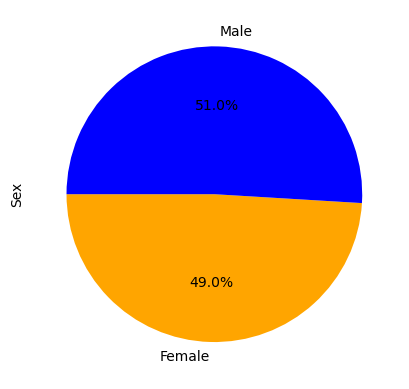

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = dataclean.groupby(["Sex"])["Mouse ID"].count()
labels = dataclean["Sex"].unique()
plt.pie(count, labels = labels, autopct = "%1.1f%%", startangle = 180, colors = ["orange", 'blue'])
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers, and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best = dataclean.loc[(dataclean["Drug Regimen"]=="Capomulin") | (dataclean["Drug Regimen"]=="Ramicane")| (dataclean["Drug Regimen"]=="Infubinol")| (dataclean["Drug Regimen"]=="Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
best = best.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
bestdf = pd.merge(best, dataclean[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]], on = ["Mouse ID", "Timepoint"], how = "left")


    

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
voldata = {"Capomulin":[], "Ramicane": [], "Infubinol":[], "Ceftamin": []}

for regimen in treatments:
    for each in bestdf.index: 
        if bestdf.iloc[each]["Drug Regimen"] == regimen: 
            voldata[regimen].append(bestdf.iloc[each]['Tumor Volume (mm3)'])
            
data2 = pd.DataFrame(voldata)
data2
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for each in treatments:
    quartiles = data2[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    outliers= data2[each].loc[(data2[each] < lower_bound) | (data2[each] > upper_bound)]
    print(f" {each} Outliers: {outliers}")

 Capomulin Outliers: Series([], Name: Capomulin, dtype: float64)
 Ramicane Outliers: Series([], Name: Ramicane, dtype: float64)
 Infubinol Outliers: 5    36.321346
Name: Infubinol, dtype: float64
 Ceftamin Outliers: Series([], Name: Ceftamin, dtype: float64)


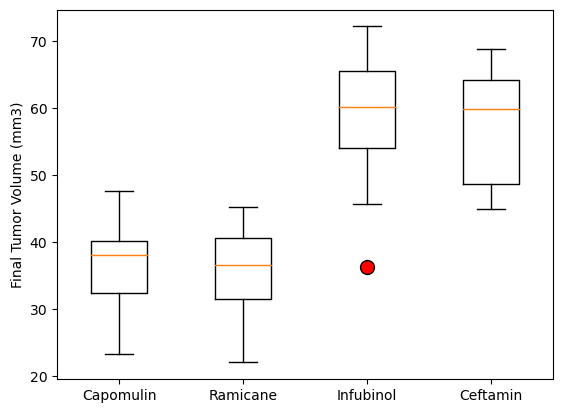

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots()
flierprops = dict(markerfacecolor = 'red', markersize = 10)
ax1.boxplot(data2, labels = treatments, flierprops = flierprops, )
ax1.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

# Line and Scatter Plots

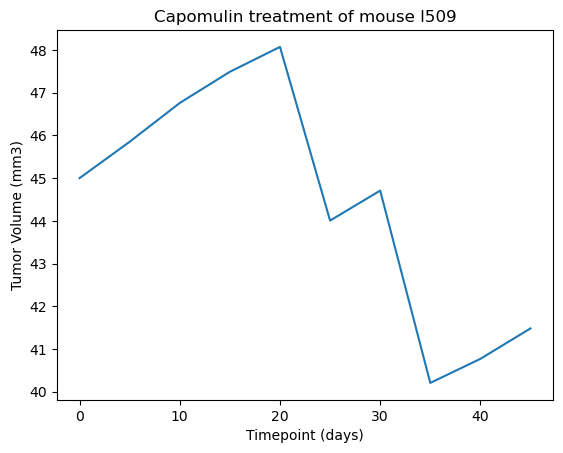

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = 'l509'
#onemouse = dataclean.loc[mouse]
onemouse = dataclean.loc[dataclean['Mouse ID'] == mouse,:]
onemousecap = onemouse.loc[onemouse["Drug Regimen"]=='Capomulin', :]
x=onemousecap["Timepoint"]
y=onemousecap['Tumor Volume (mm3)']


line = plt.plot(x,y)

plt.xlabel('Timepoint (days)')
plt.title("Capomulin treatment of mouse l509")
plt.ylabel('Tumor Volume (mm3)')
plt.show()


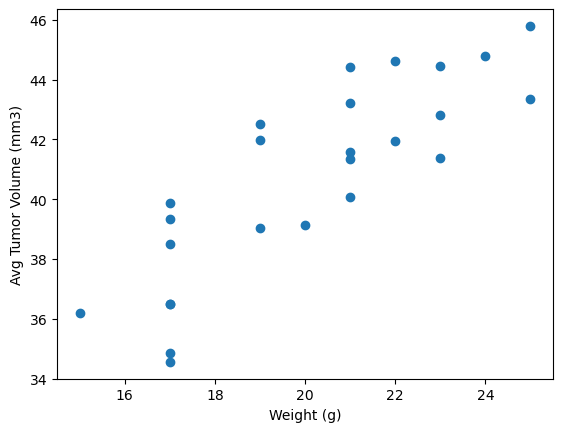

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capdata = dataclean.loc[dataclean["Drug Regimen"]=='Capomulin',:]

capdata = capdata.drop(columns =["Drug Regimen", "Sex"])
capdata = capdata.groupby(["Mouse ID"]).mean()


plt.scatter(capdata["Weight (g)"], capdata["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

plt.show()

# Correlation and Regression

The correlation coefficient between mouse weight and average observed tumor volume is 0.84


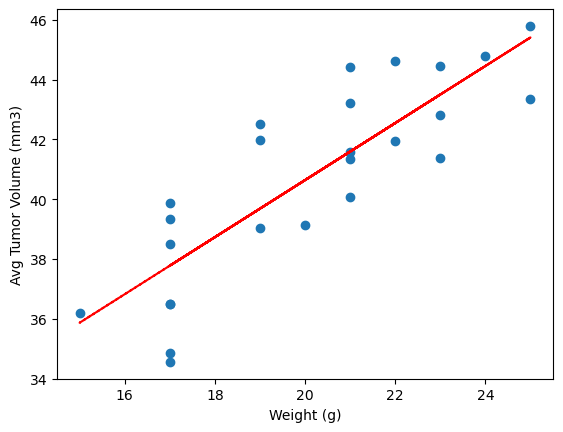

In [70]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
co = round(st.pearsonr(capdata["Weight (g)"], capdata["Tumor Volume (mm3)"])[0],2)

print(f"The correlation coefficient between mouse weight and average observed tumor volume is {co}")


slope, int, r, p, std_err = st.linregress(capdata["Weight (g)"], capdata["Tumor Volume (mm3)"])
fit = slope * capdata["Weight (g)"] + int

capdata = dataclean.loc[dataclean["Drug Regimen"]=='Capomulin',:]

capdata = capdata.drop(columns =["Drug Regimen", "Sex"])
capdata = capdata.groupby(["Mouse ID"]).mean()

#x1=capdata["Weight (g)"]
#y2 = capdata["Tumor Volume (mm3)"]
plt.scatter(capdata["Weight (g)"], capdata["Tumor Volume (mm3)"])
plt.plot(capdata["Weight (g)"], fit,"--", color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')


plt.show()
